# PCA

## Imports y Constantes

In [7]:
from tp4.Oja.pca_plots import *
from tp4.tools import csv_to_dict, standardize_data

countries, labels, country_data = csv_to_dict("./europe.csv")
standardized_country_data = standardize_data(country_data)

labels.pop(0) # Drop country label

standardized_matrix = np.array(list(standardized_country_data.values()), dtype=np.float64)
not_standardized_matrix = np.array(list(country_data.values()), dtype=np.float64)

## Estandarización

La estandarización de los datos implica transformar las variables originales de tal manera que tengan una media de cero y una desviación estándar de uno.

Es importante estandarizar los datos al hacer PCA por las siguientes razones:

1. Escala de las variables: Las variables que tienen escalas diferentes pueden tener un impacto desproporcionado en el análisis de PCA. Si una variable tiene una escala mucho mayor que otra, puede dominar la varianza total y, en consecuencia, tener un peso excesivo en la determinación de las componentes principales. Al estandarizar los datos, todas las variables se colocan en la misma escala, lo que asegura que todas tengan un impacto similar en el análisis.

2. Eliminación del sesgo: La estandarización de los datos elimina el sesgo que puede surgir debido a las diferencias en las unidades de medida y las magnitudes de las variables. Al igualar las escalas, se garantiza que las variables no estén influenciadas por unidades arbitrarias o escalas relativas.

3. Interpretación de los resultados: Al estandarizar los datos, las cargas de las variables (los coeficientes que indican la contribución de cada variable a las componentes principales) se vuelven más fácilmente interpretables.

### Datos no estandarizados

Gráficando los dominios conocidos de estas variables no podedemos observar claramente los valores que toman las variables distintas de Área y GDP. Luego, aquellas con valores más altos tienden a contribuir más a la varianza total de los datos. Esto puede llevar a que las variables con mayores valores dominen las componentes principales.

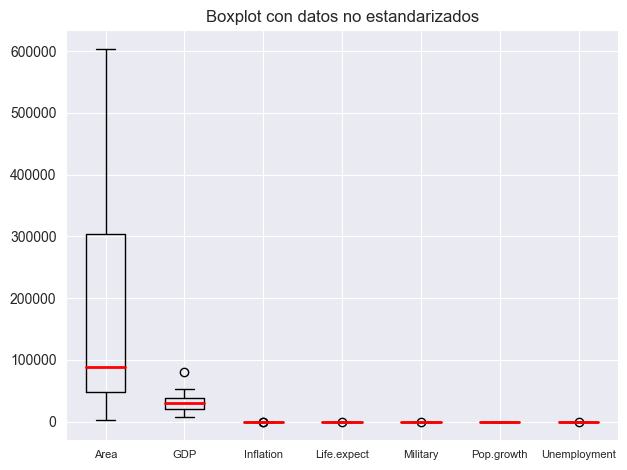

In [8]:
plot_boxplot(not_standardized_matrix, 'Boxplot con datos no estandarizados', labels)

### Datos estandarizados

Sin embargo, al estandarizar los datos, se nota claramente la variabilidad de dichas características permitiéndonos compararlas entre sí.

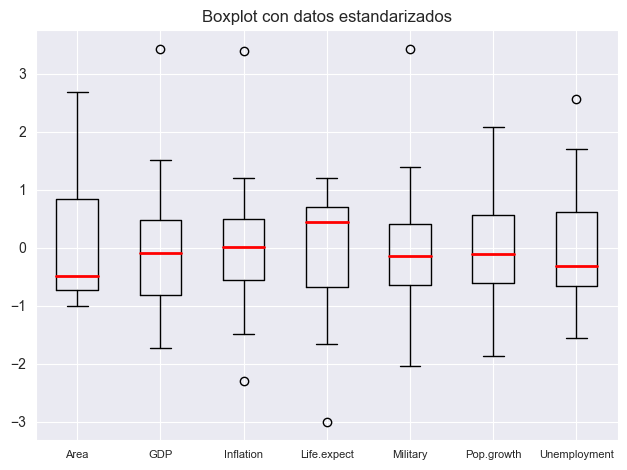

In [9]:
plot_boxplot(standardized_matrix, 'Boxplot con datos estandarizados', labels)


### Biplot PC1 y PC2

Separación de variables:

La PC1 separa las caracteristicas en dos:
1. GDP, Pop.growth y Life expect.
2. Military, Unemployment, Area e Inflation.

La PC2 separa las característicasen en dos:
1. GDP, Area e Inflation.
2. Pop.growth, LIfe expect, Unemployment y Military

Luego, podemos sacar muchas conclusiones de este gráfico.

1. Relaciones entre variables: Las variables originales que están ubicadas cerca una de la otra en el biplot tienen una alta correlación. Esto indicaría que Military y Unemployment o Area e Inflation están correlacionadas.
2. Contribución de las variables: Las variables originales que se extienden más en el biplot tienen una mayor influencia en la estructura de los datos. Viendo el gráfico todas parecen influir de manera similar, a excepción de Area.
3. Posición de las observaciones: Las observaciones individuales (puntos en el biplot) pueden proporcionar información sobre su relación con las variables originales. Si queremos ahondar más en las características de cada país, este gráfico nos ayuda mucho. Por ejemplo, podemos determinar que Ucrania es el país con mayor inflación; que Grecia es el país que más presupuesto militar tiene; que Croacia es el país con mayor tasa de desempleo; o que Luxemburgo es el país con mayor PBI (GDP).
4. Interpretación global del análisis: El biplot permite una interpretación visual rápida y global de cómo las variables y las observaciones se relacionan entre sí en el espacio de dos dimensiones. Con esto en mente se pueden sacar patrones, identificar outliers o resumir la variabilidad de los datos en una forma más compacta.


Vectores de carga:
[ 0.1248739  -0.50050586  0.40651815 -0.48287333  0.18811162 -0.47570355
  0.27165582]
[-0.1728722  -0.13013955 -0.36965724  0.2652478   0.65826689  0.08262198
  0.55320371]
Labels:
['Area', 'GDP', 'Inflation', 'Life.expect', 'Military', 'Pop.growth', 'Unemployment']


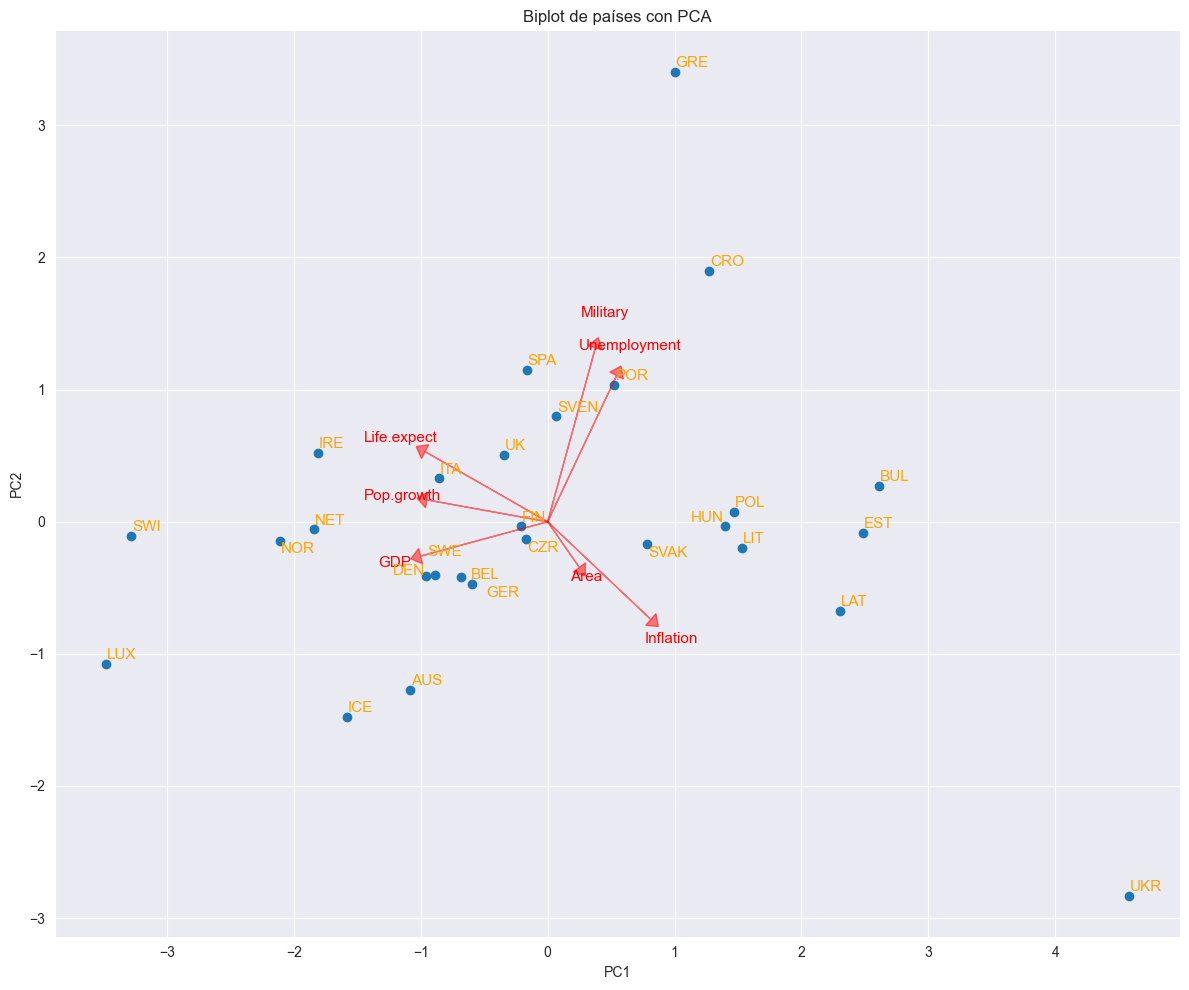

In [10]:
plot_biplot_with_sklearn(standardized_matrix, countries, labels)

### Plot barchart PC1

Si tenemos un país con PC1 negativa, se ve más afectado por aquellas características que tengan carga negativa. En este caso, si PC1 es negativa, el país se ve mas afectado por Area, Inflation, Unemployment y Military.

A la inversa, si tenemos un país con PC1 positiva, se ve más afectado por aquellas características que tengan carga poistiva. En este caso se ven más afectados por GDP, Pop.growth y Life expect.

Nuevamente se pueden sacar muchas conclusiones:

1. Identificación de países atípicos: Existen países que tienen barras significativamente más largas o más cortas en comparación con otros. Aquellos con barras más largas pueden considerarse atípicos en términos de su contribución a la PC1, lo que implica que tienen características o características únicas en comparación con el resto de los países.
2. Patrones de agrupación: Se pueden buscar patrones de agrupación o similitud entre países en términos de su posición en la PC1. Si varios países tienen barras similares en longitud o valores cercanos en el eje vertical, esto puede indicar que comparten características comunes o están agrupados en función de las características representadas por la PC1.
3. Interpretación global del análisis: En este caso particular no se podrían tomar a las cargas negativas como algo malo, como sí pasaba en el ejemplo que vimos en clase, ya que no todo lo malo (Inflación o Desempleo) tiene cargas negativas. Igualmente eso no es necesario ya que en este caso, son las características con cargas positivas más altas. Por lo que, por ejemplo, Ucrania sería el país con más problemas de este tipo. Seguido de Latvia, Estonia y Bulgaria. Las mismas inferencias se podrían realizar en otros casos, tomando otras características a modo de ejemplo.

Vector de carga:
[ 0.1248739  -0.50050586  0.40651815 -0.48287333  0.18811162 -0.47570355
  0.27165582]
Labels:
['Area', 'GDP', 'Inflation', 'Life.expect', 'Military', 'Pop.growth', 'Unemployment']


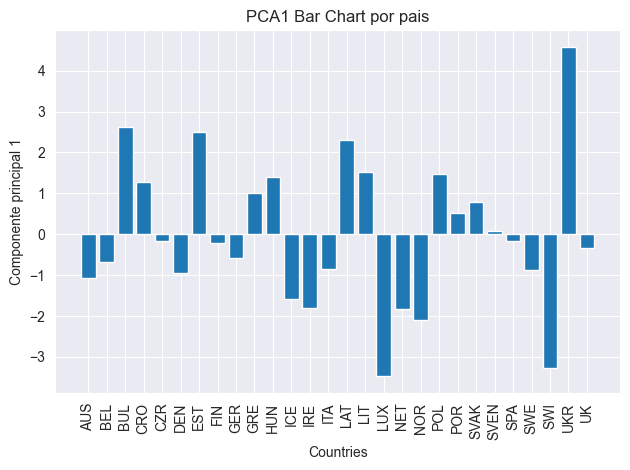

In [11]:
plot_PCA1_barchart_with_sklearn(standardized_matrix, countries, labels)